In [1]:
from metrics import *
import torch
from torch_geometric.datasets import Amazon
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
import numpy as np
from time import time
from tqdm import tqdm
from utils import *
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import umap
import trimap

random_state = 0
random.seed(0)
torch.manual_seed(0)

print("Cuda available?", torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Cuda available? True


In [2]:
dataset_name = "Amazon"
original_gnn = "original"
algorithm_name = "TSNE"

dataset = Amazon(root='.', name='Computers')
data = dataset[0]

X = data.x.numpy()
y = dataset[0].y.cpu().numpy()


Calculating d_hd
Amazon TSNE-euclidean
Calculating d_hd
Amazon TSNE-l1
Calculating d_hd
Amazon TSNE-l2
Calculating d_hd
Amazon TSNE-manhattan
Calculating d_hd
Amazon TSNE-cosine
Finished.


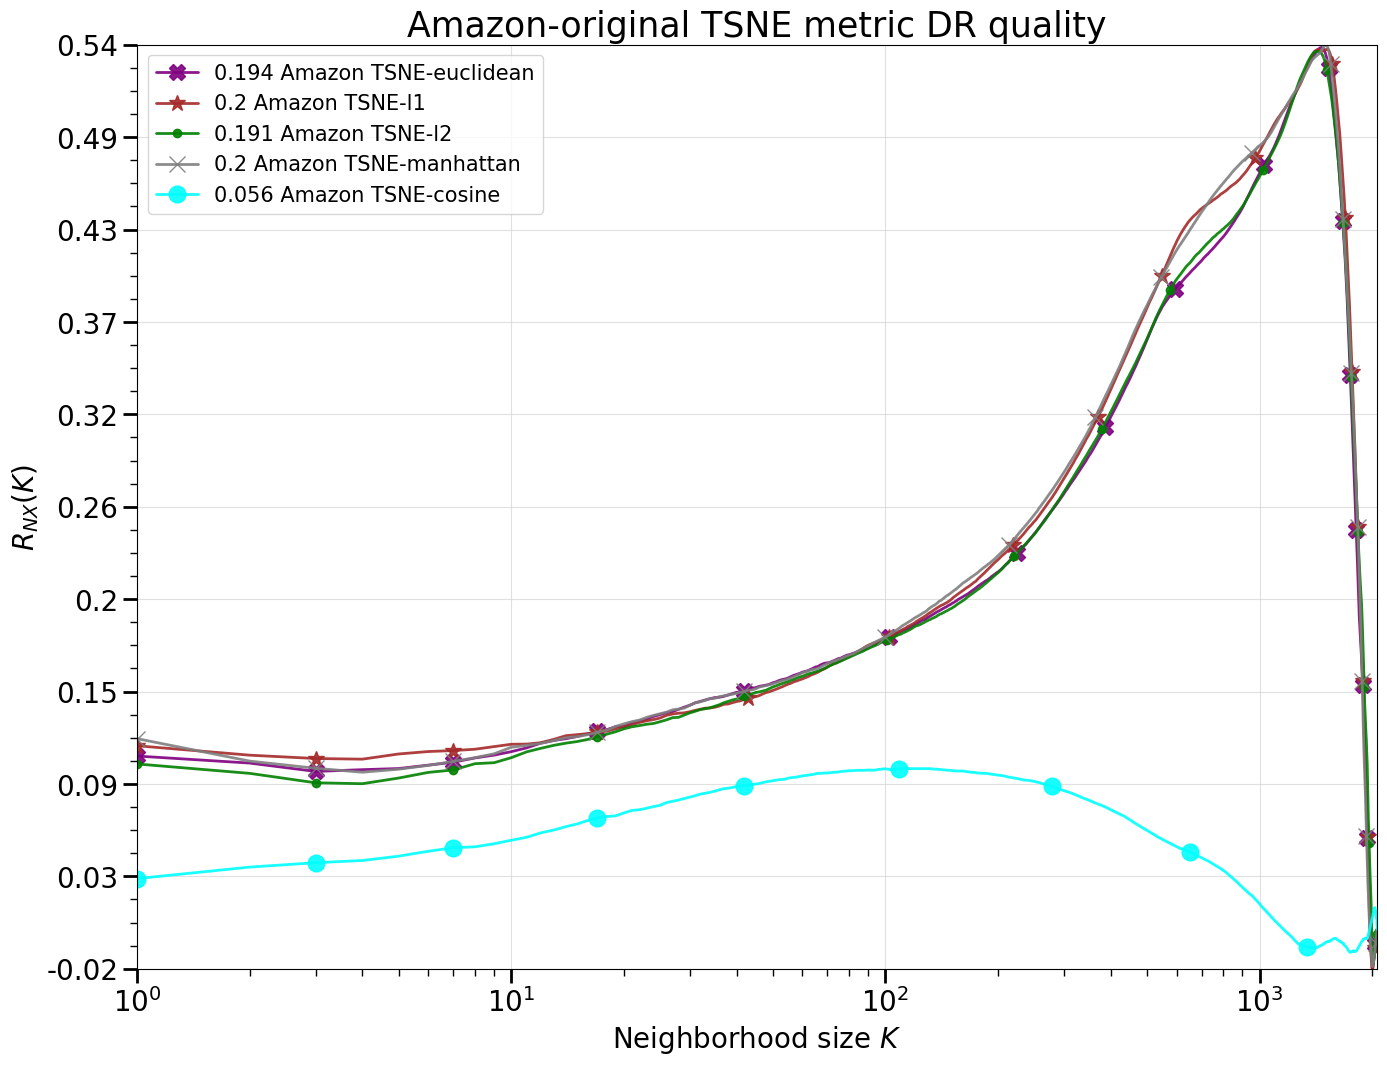

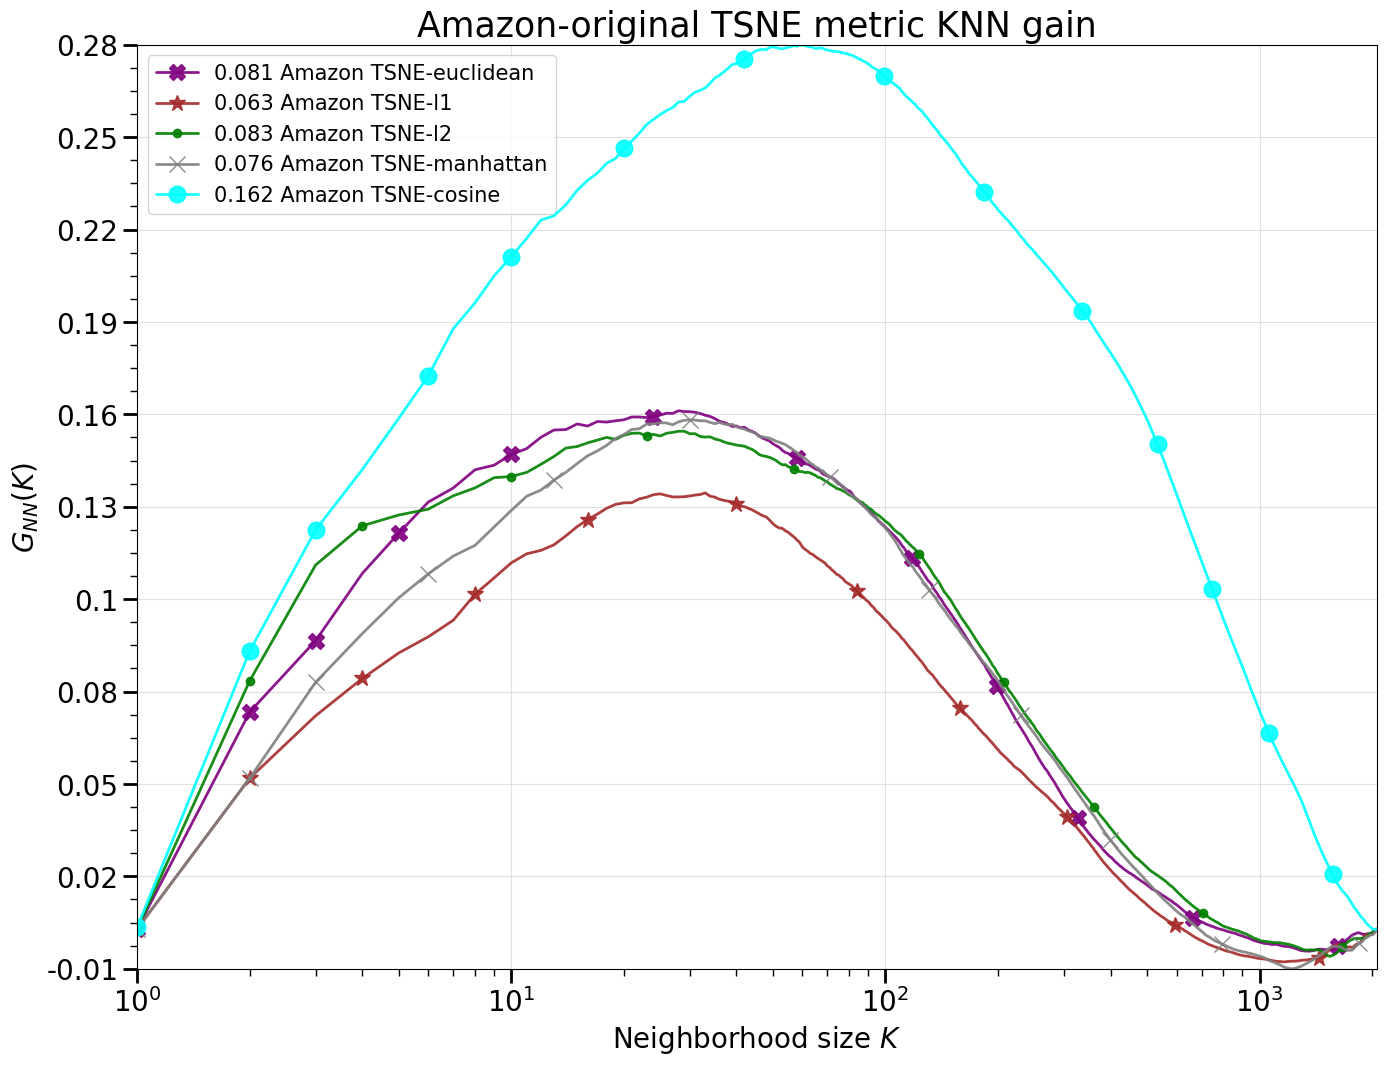

In [3]:
local_metrics = LocalMetric()

for dist in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
    tsne = TSNE(n_components=2, random_state=random_state, metric=dist)
    tsne_results = tsne.fit_transform(X)

    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{dist}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE metric")

Calculating d_hd
Amazon TSNE-300
Calculating d_hd
Amazon TSNE-500
Calculating d_hd
Amazon TSNE-1000
Calculating d_hd
Amazon TSNE-2000
Calculating d_hd
Amazon TSNE-5000
Finished.


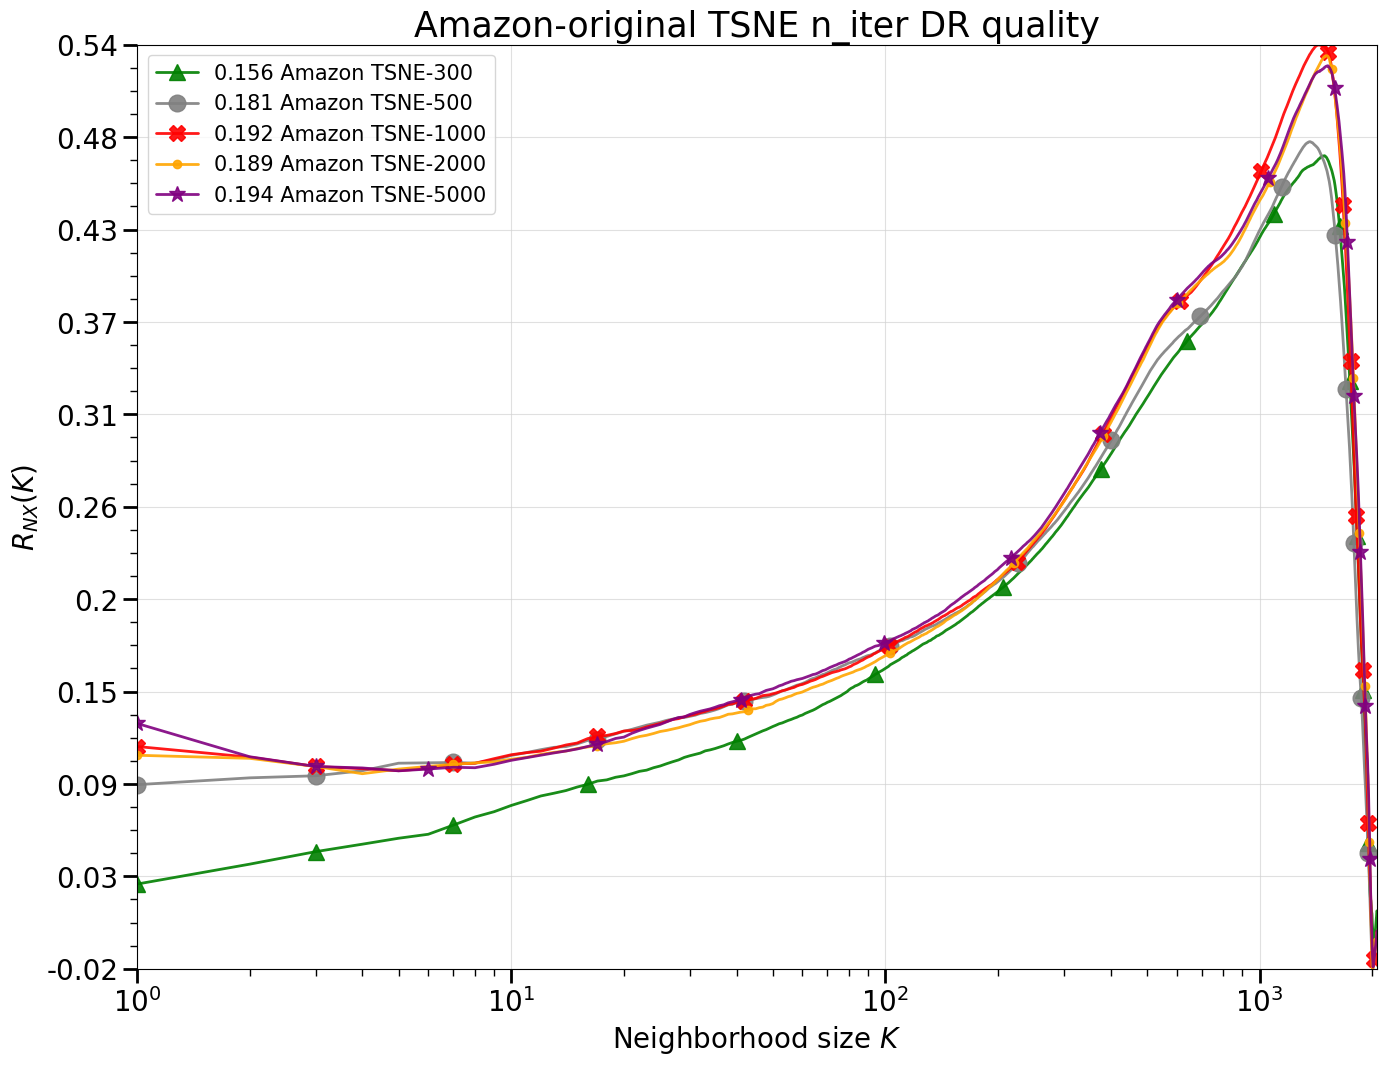

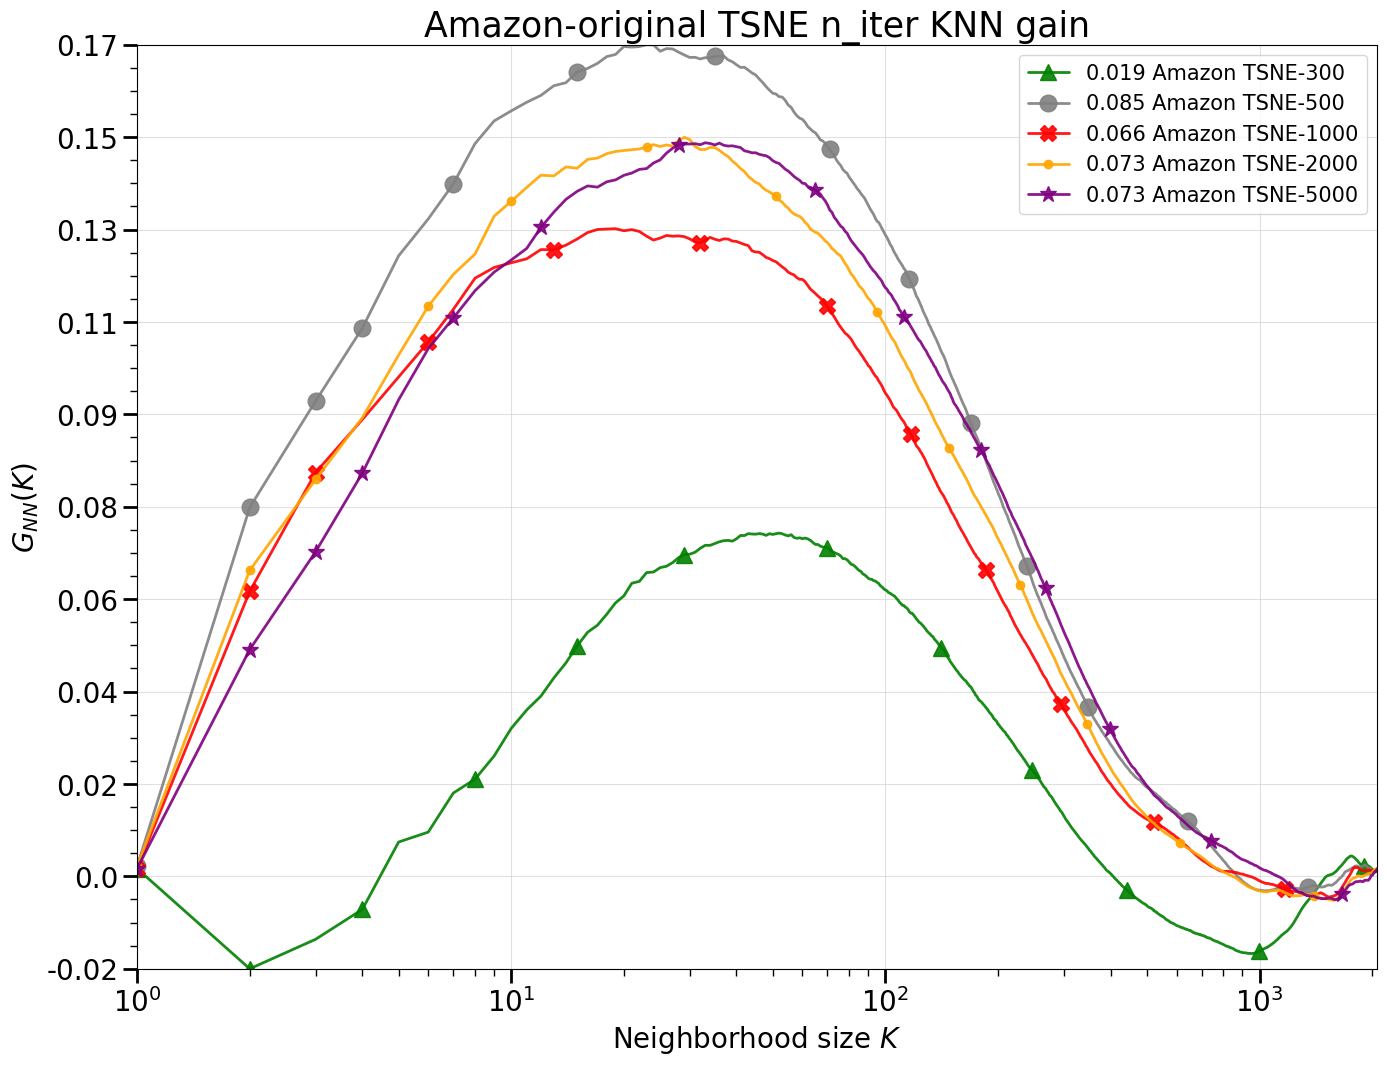

In [4]:
local_metrics = LocalMetric()

for n_iter in [300, 500, 1000, 2000, 5000]:
    tsne = TSNE(n_components=2, random_state=random_state, n_iter=n_iter)
    tsne_results = tsne.fit_transform(X)

    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{n_iter}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE n_iter")

Calculating d_hd
Amazon TSNE-10
Calculating d_hd
Amazon TSNE-100
Calculating d_hd
Amazon TSNE-500
Calculating d_hd
Amazon TSNE-1000
Finished.


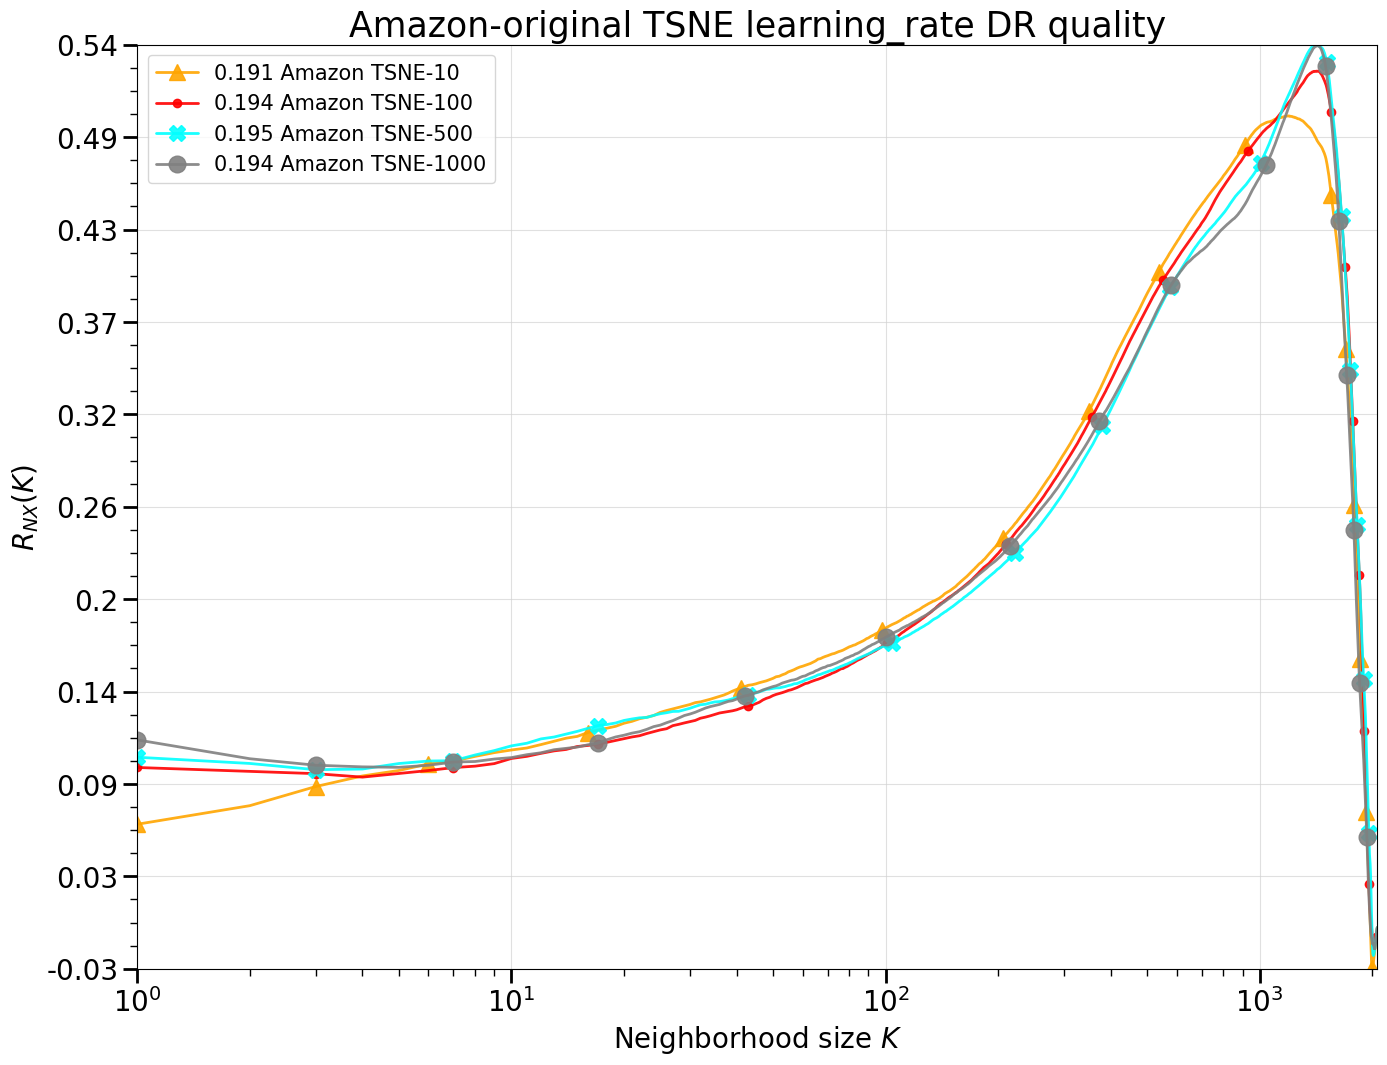

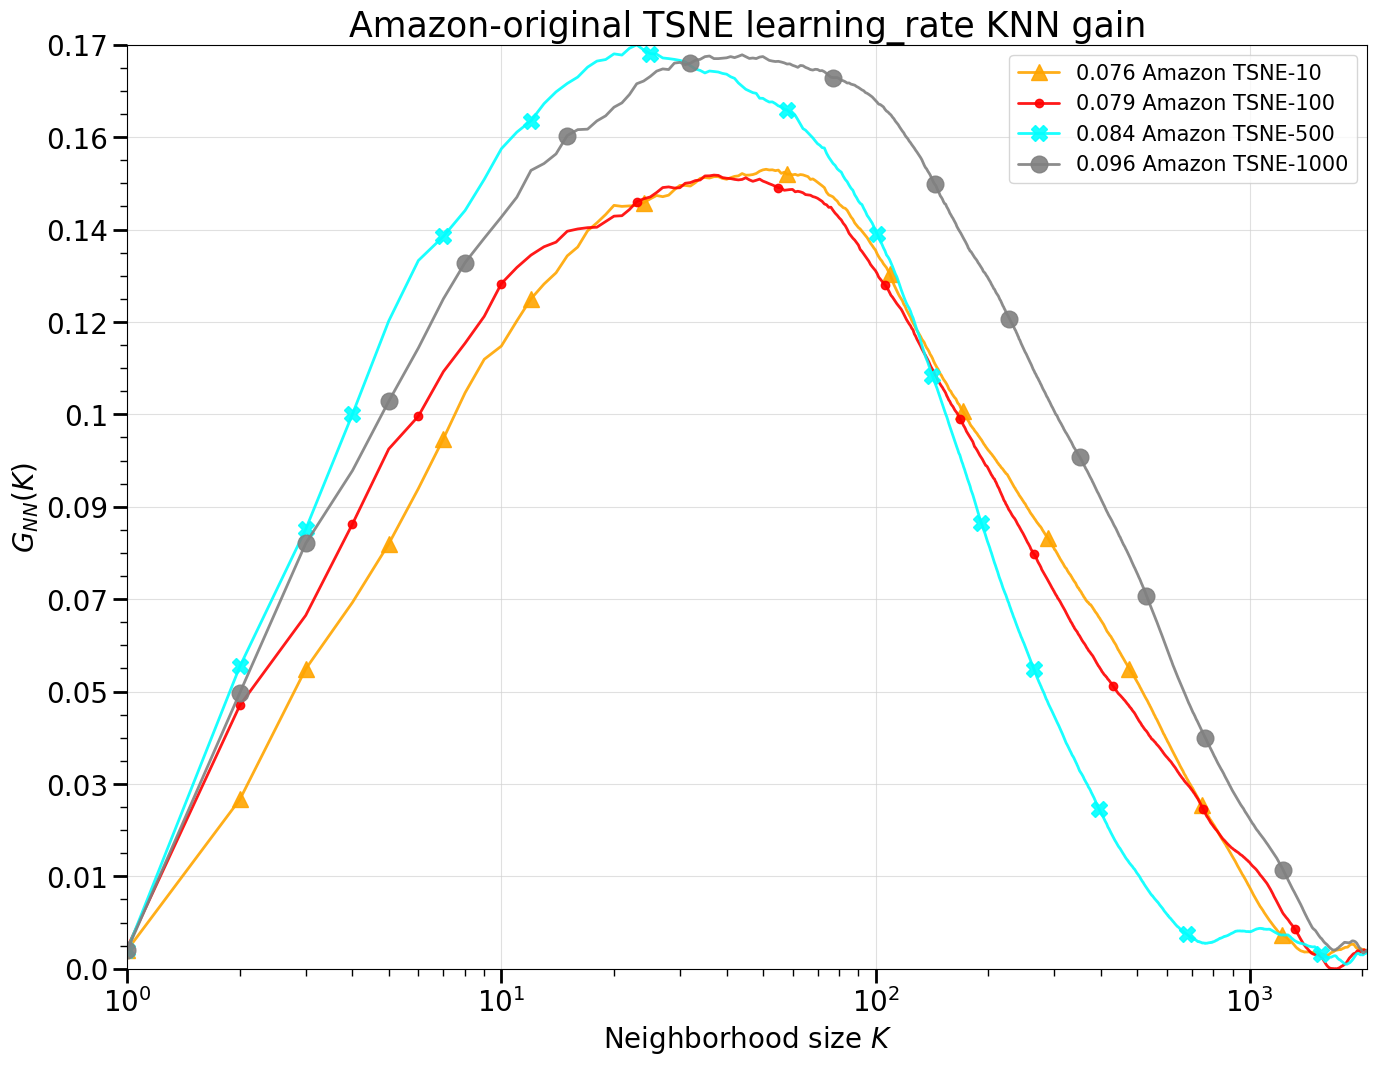

In [5]:
local_metrics = LocalMetric()

for learning_rate in [10, 100, 500, 1000]:
    tsne = TSNE(n_components=2, random_state=random_state, learning_rate=learning_rate)
    tsne_results = tsne.fit_transform(X)

    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{learning_rate}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE learning_rate")

Calculating d_hd
Amazon TSNE-5
Calculating d_hd
Amazon TSNE-30
Calculating d_hd
Amazon TSNE-50
Calculating d_hd
Amazon TSNE-100
Finished.


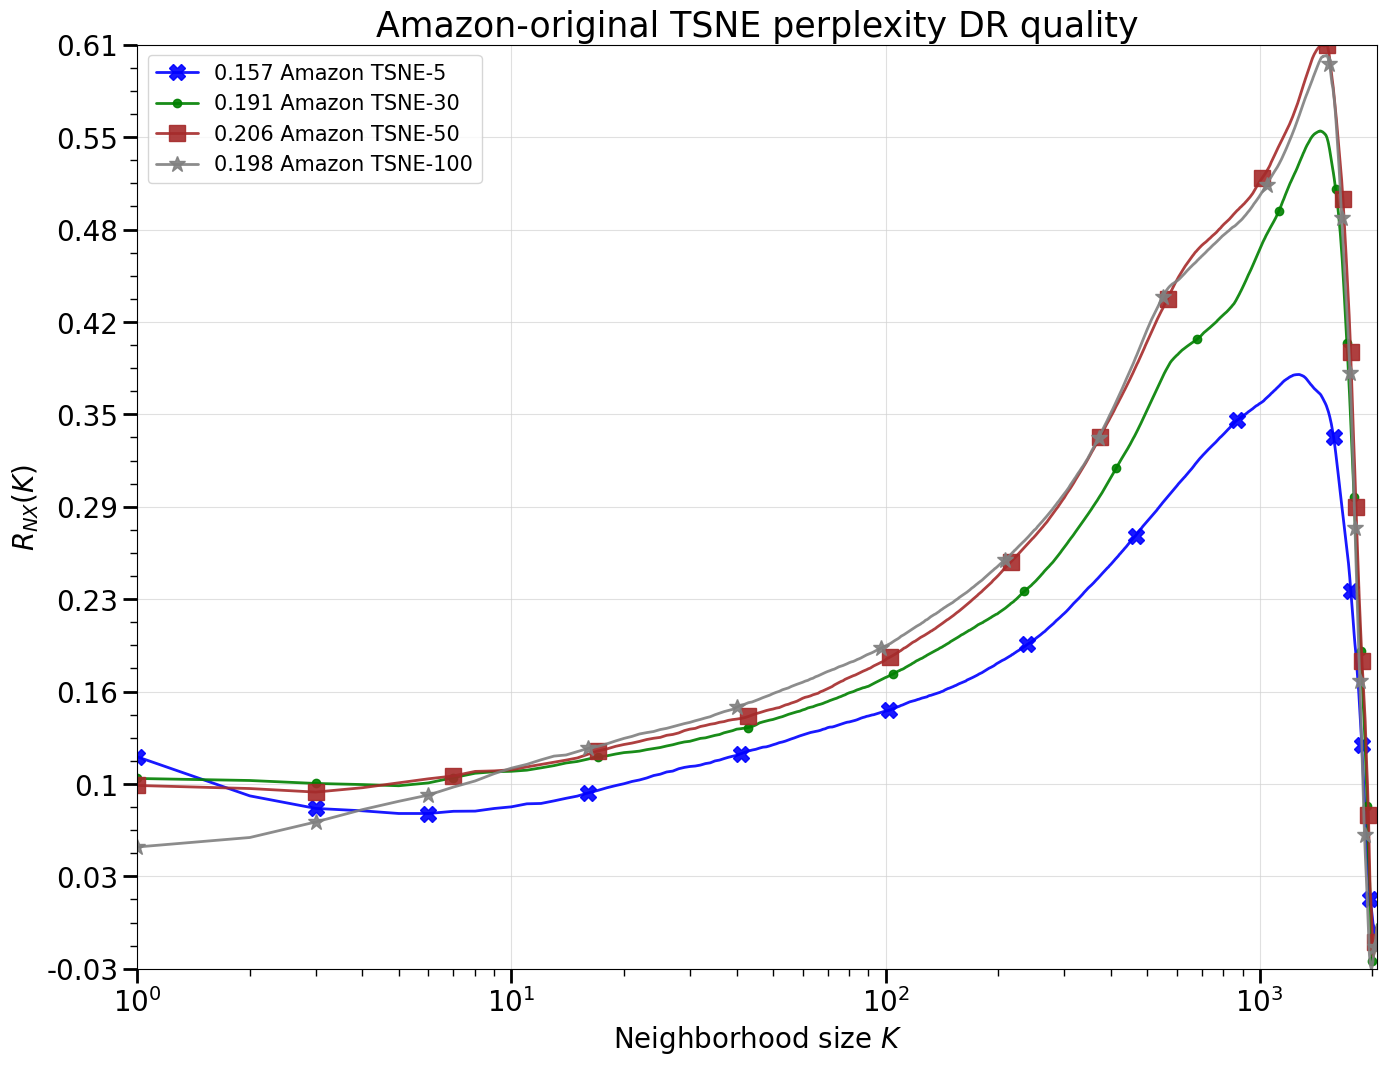

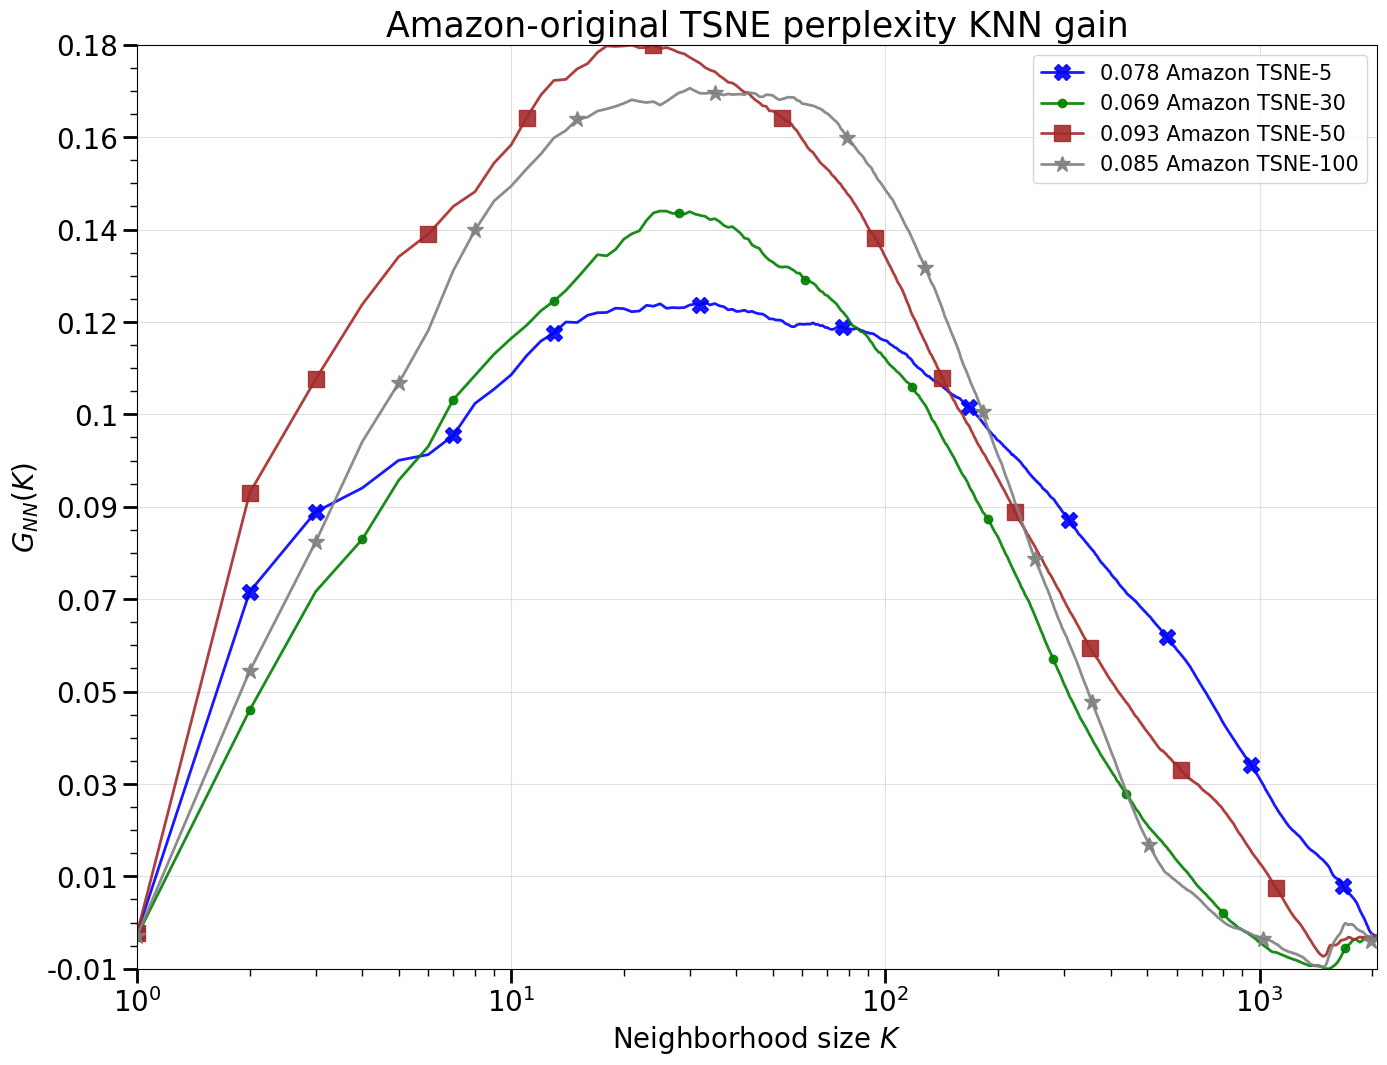

In [6]:
local_metrics = LocalMetric()

for perplexity in [5, 30, 50, 100]:
    tsne = TSNE(n_components=2, random_state=random_state, perplexity=perplexity)
    tsne_results = tsne.fit_transform(X)

    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{perplexity}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE perplexity")